# Tobig's 15기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


In [3]:
data.describe() #데이터 각 변수별 통계량 살펴보기

,Label,bias,experience,salary
count,200.000000,200.0,200.000000,200.000000
mean,0.260000,1.0,4.998000,66700.000000
std,0.439735,0.0,2.847373,15536.955459
min,0.000000,1.0,0.100000,30000.000000
25%,0.000000,1.0,2.500000,56000.000000
50%,0.000000,1.0,5.100000,65000.000000
75%,1.000000,1.0,7.425000,77250.000000
max,1.000000,1.0,10.000000,107000.000000


## Train Test 데이터 나누기

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [8]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [9]:
# parameter 개수
N = len(X_train.loc[0])

In [10]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.28490867, 0.19686292, 0.87859438])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [11]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += np.dot(np.transpose(parameters),X)
    return z

## Logistic Function

## $p = 1/(1+e^{-z})$



In [12]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1/(1+np.exp(-z))    
    return p

In [13]:
logistic(X_train.iloc[1], parameters)

0.8416836013204051

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

Logistic Reression의 목적함수 Negative Log Likelihood = binary Cross Entropy = logistic regression cost function  
## $l(p) = -\Sigma \begin{Bmatrix}y_{i}log p( X_{i} )+(1-y_{i})log(1-p(X_{i}))\end{Bmatrix} $  


In [14]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss = -np.sum(y * np.log(logistic(X, parameters)/(1-logistic(X, parameters)))+np.log(1-logistic(X, parameters)))
    return loss

In [15]:
def mse_i(X, y, parameters):
    y_hat = np.dot(np.transpose(parameters),X) 
    loss = (1/2)*np.sum((y-y_hat)**2)
    return loss

In [16]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]): #데이터 개수만큼 반복
        X = X_set.iloc[i,:] #i번째 row의 데이터 (보든 column)
        y = y_set.iloc[i]   #i번째 row
        loss += loss_function(X,y,parameters) #loss function -> minus_log_cross_entropy_i
    loss = loss/n #loss 평균값으로 계산
    return loss

In [17]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

2.4175201718914234

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)= -\Sigma(y_iX_{i} - \theta^{T}X_i^2) $

## ${\partial\over{\partial \theta_j}}l(p)= -\Sigma  \begin{pmatrix}y_{i}-p{i}\end{pmatrix}x_{ij} $

In [18]:
def get_gradient_ij(X, y, parameters, j, model):
    # model -> logistic: 1/(1+np.exp(-z))  
    if model == 'linear':
        y_hat = np.dot(np.transpose(parameters),X) 
        gradient = -np.sum(y*X - y_hat*X) #y_hat = theta transformed * X
    else:
        p = logistic(X, parameters)
        gradient = -np.sum(y-p)*X[j]
    return gradient

In [19]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.1664232902963157

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [20]:
#batch gradient -> 학습 한 번에 모든 데이터셋에 대해 기울기 구함
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X,y,parameters,j,model)
    
    return gradients

In [21]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[44.30802036988213, 26.164940521840116, 64.68700218231452]

## mini-batch
인덱스로 미니 배치 나누기

In [22]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: 
    전체 데이터셋을 mini-batch size로 지정된 batch_size만큼의 크기의 작은 단위로 나누어 학습에 사용될 때 사용되는 함수이다. 
    모든 데이터에 대해 가중치 평균을 구하는 것이 아닌, 전체 데이터에서 batch_size만큼의 일부 데이터를 묶음으로 학습을 진행시키기 위해 데이터를 batch 단위로 나누는 함수이다. 

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [23]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= (1/n)*learning_rate
    
    parameters -= gradients
    return parameters

In [24]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.2819548 , 0.19511859, 0.87428192])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch:  
- num_epoch:
<br>

BGD: (Batch Gradient Descent) 학습 한 번에 모든 데이터셋에 대해 기울기를 구한다. Loss function을 미분하여 가중치 업데이트시 개별 데이터로 하기 보다 모든 데이터에 대한 Loss function의 평균을 기준으로 업데이트가 수행된다
SGD: (Stochastic Gradient Descent) 학습 한 번에 임의의 데이터에 대해서만 기울기를 구한다. 입력 데이터를 하나씩만 처리하면서 가중치를 업데이트 한다
MGD: (Mini Batch Gradient Descent) 학습 한 번에 데이터셋의 일부에 대해서만 기울기를 구한다. 전체 데이터에서 일부 데이터를 묶음방식으로 하여 해당 batch의 평균 가중치를 업데이트 한다
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD     
batch_size=k -> MGD     
batch_size=whole -> BGD     

In [41]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])    #row 길이
    parameters = np.random.rand(N)  #parameter 랜덤 값으로 초기화
    loss_function = batch_loss
    if model == 'logistic':
        gradients = get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')
    else: 
        gradients = get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'linear')
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size) 
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:  #batch 데이터의 개수만큼 반복
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_train, y_train, parameters, model)       #기울기 저장
            parameters = step(parameters, gradients, learning_rate, len(X_train))      #parameter 업데이트
            new_loss = loss_function(X_train, y_train, parameters, minus_log_cross_entropy_i, len(X_test))     #loss 업데이트
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [42]:
new_param_bgd = gradient_descent(X_train, y_train, learning_rate = 0.5, num_epoch = 3000, tolerance = 0.00001, model = 'logistic', batch_size = 16)
new_param_bgd

epoch: 0  loss: 1.2737894207722644  params: [-0.30433994  0.36384359 -0.33747209]  gradients: [0.016311873992007425, -0.028519295720749033, 0.028997231220538752]


array([-0.60514761,  1.3665872 , -1.29383237])

In [43]:
new_param_sgd = gradient_descent(X_train, y_train, learning_rate = 0.7, num_epoch = 500, tolerance = 0.00001, model = 'logistic', batch_size = 32)
new_param_sgd

epoch: 0  loss: 1.426799199720984  params: [-0.29497138  0.23030891 -0.20556743]  gradients: [0.021148629526084442, -0.05591525583985673, 0.05697139847680439]


array([-0.60765387,  1.37471326, -1.30132977])

In [44]:
new_param_mgd = gradient_descent(X_train, y_train, learning_rate = 0.3, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 64)
new_param_mgd

epoch: 0  loss: 2.4440601226737972  params: [ 0.18411062  0.55901713 -0.13434168]  gradients: [0.10367973715706107, 0.04852975123103066, 0.08817857275643529]
epoch: 100  loss: 0.8963969568096499  params: [-0.59046587  1.31891055 -1.24977145]  gradients: [0.00019077975777603154, -0.0006203951953911328, 0.0005741732064121232]


array([-0.6003141 ,  1.35090531, -1.27935355])

### Predict Label

In [45]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [46]:
from sklearn.metrics import *

In [47]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 1,  9]], dtype=int64)

In [48]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.94


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [49]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [50]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [51]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.34928091, 2.88895741])

In [52]:
#경사하강법
new_param = gradient_descent(X, y, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'linear', batch_size = 16)
new_param

epoch: 0  loss: -9.316043886810556  params: [1.29063089 1.0409495 ]  gradients: [-0.009782475269967431, -0.009782475269967431]


array([1.32389081, 1.07420942])

In [53]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

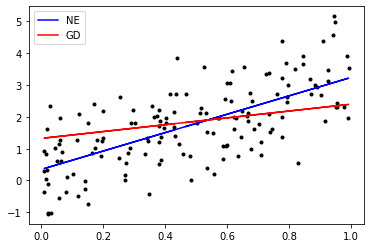

In [54]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()